In [136]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


IMPORT MNIST DATA SET using Tensor Flow and load it into MNISTdata object


In [137]:
MNISTdata = tf.keras.datasets.mnist 

In [138]:
(train_images, Train_labels), (Test_images, Test_labels) = MNISTdata.load_data()

In [139]:
import numpy as np
from random import choice, randint
height = 56
width = 56
def copy_image(source, x,y):
      dest = np.zeros((height,width), np.float32)
      dest[x:x+28,y:y+28] = source[:,:]
      return dest
def repositionDataTrain(data):
  repositioned = []
  for im in data:
    x = randint(0, 2)
    y = randint(0, 27)
    dest = copy_image(im, x,y)
    repositioned.append(dest)
  return np.array(repositioned)
def repositionDataTest(data):
  repositioned = []
  for im in data:
    x = randint(0, 27)
    y = randint(0, 2)
    dest = copy_image(im, x,y)
    repositioned.append(dest)
  return np.array(repositioned)

In [140]:
x_train_repos = repositionDataTrain(train_images)
x_test_repos = repositionDataTest(Test_images)
trainX = x_train_repos.reshape((x_train_repos.shape[0], 56, 56, 1))
testX = x_test_repos.reshape((x_test_repos.shape[0], 56, 56, 1))

In [ ]:
#(train_images, Train_labels), (Test_images, Test_labels) = MNISTdata.load_data()
#trainX =train_images.reshape((train_images.shape[0], 28, 28, 1))
#testX = Test_images.reshape((Test_images.shape[0], 28, 28, 1))

In [141]:
train_images = trainX / 255.0
Test_images = testX / 255.0

Divide the object ( data ) into 2 sections ... The train and the test section ..... and load data


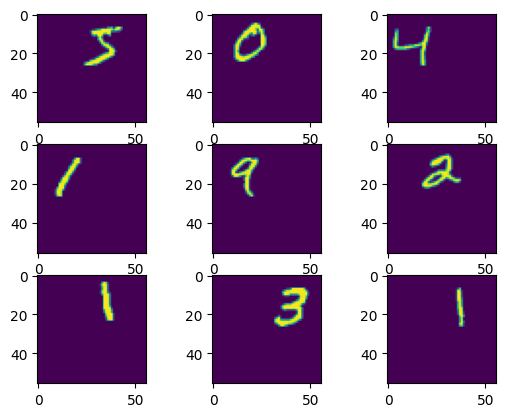

In [142]:
for i in range(9):
  # defining a pyplot 
  plt.subplot(330 +1 +i)
 
 # showing the first 9 images ( plotting the raw pixel data )
  plt.imshow(trainX[i])

The above is the raw data ( thats how data is)


In [143]:

print(trainX.shape)
print(trainX[0])

(60000, 56, 56, 1)
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


** The above images in Matrix form (60000 28 28)

1) So we have a collection of 60000images and each image is 28 * 28 pixel dimension
 
2) Each number represents the pixel intensity 

3) the range is from 0 to 255 



## * Lets normalize the data now  ( we are rounding of it to the scale of 0 to 1) 



In [128]:
#train_images = trainX / 255.0
#Test_images = testX / 255.0

#*** Fully Connected layer ( Dense)

# ** Now lets build the Neural Network

#* 1) We are creating a layer of networks in sequence and inside this function we need to define each and every layer 

# *2) One input, one output, one hidden layer 

In [146]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(56, 56)), 
                                    tf.keras.layers.Dense(128, activation= 'relu'),
                                    tf.keras.layers.Dense(128, activation= 'relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


# * We are using Adam optimizer 
# * and the cost function is Crossentropy
# * and Metrics to print accuracy at every step of the model



In [148]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#* Now lets Train the model

#* here we are giving the training data set. 
#* 1) training images and training labels and the number of iterations we are putting it to 10


In [149]:
 DenseModel = model.fit(trainX, Train_labels, epochs = 15, validation_data= (testX, Test_labels))

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 2.0030 - accuracy: 0.5922 - val_loss: 25.8338 - val_accuracy: 0.2030
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8090 - accuracy: 0.7649 - val_loss: 23.2855 - val_accuracy: 0.2192
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5790 - accuracy: 0.8308 - val_loss: 24.0163 - val_accuracy: 0.1995
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4373 - accuracy: 0.8706 - val_loss: 19.6570 - val_accuracy: 0.2175
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3667 - accuracy: 0.8921 - val_loss: 18.8897 - val_accuracy: 0.2380
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3186 - accuracy: 0.9048 - val_loss: 19.7915 - val_accuracy: 0.2414
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2908 - accuracy: 0.9141 - val_loss: 23.7432 - val_ac

# * Lets test the data set 




In [150]:
model.evaluate(testX, Test_labels, verbose=2)

313/313 - 1s - loss: 36.8516 - accuracy: 0.2513 - 623ms/epoch - 2ms/step


[36.85157012939453, 0.25130000710487366]

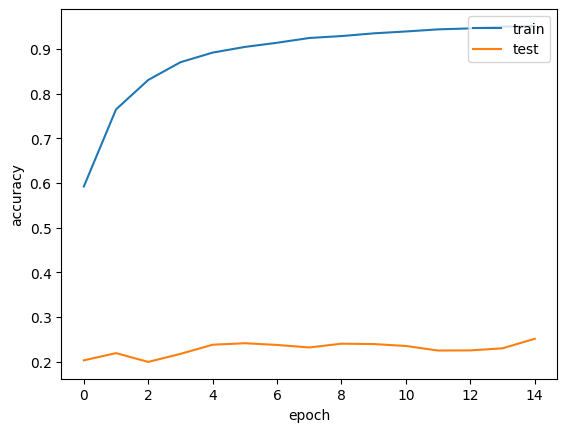

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(DenseModel.history['accuracy'])
plt.plot(DenseModel.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()




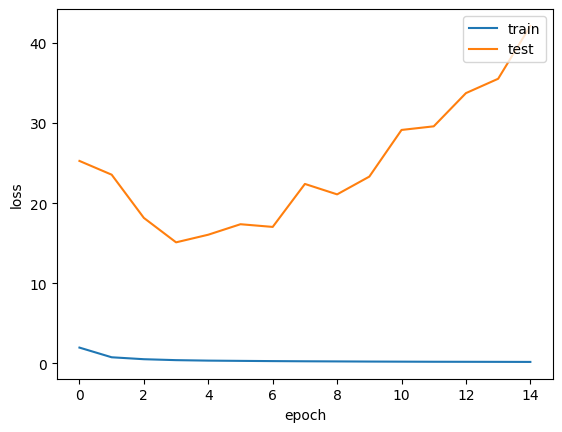

In [93]:
plt.plot(DenseModel.history['loss'])
plt.plot(DenseModel.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#* We got an Accuracy of 95% ( Not Bad)

#* Lets check the Accuracy for Individual Element


313/313 [==============================] - 1s 2ms/step
7


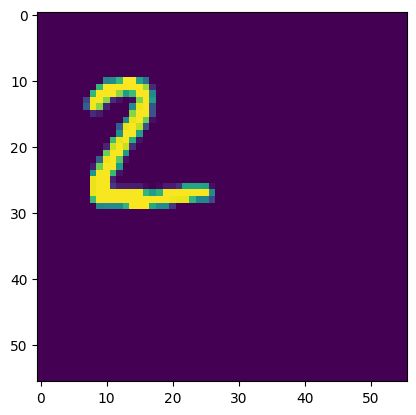

In [95]:
plt.imshow(testX[1])
predict_images= model.predict(testX)
print(np.argmax(predict_images[1])) # to check maximum probability

#* We picked the second element from data set (index 2) and checked it to see if it is predicting correctly and it did good prediction 

#*** For CNN

In [96]:
from tensorflow.keras import layers

In [97]:

model_CNN = tf.keras.models.Sequential()

In [98]:

model_CNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56,56,1)))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dense(100, activation='relu'))
model_CNN.add(layers.Dense(10))
model_CNN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_CNN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 54, 54, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_16 (Dense)            (None, 100)              

#* Now lets train the CNN network



In [99]:
CNN_Train = model_CNN.fit(trainX, Train_labels, epochs = 10, validation_data= (testX, Test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3973 - accuracy: 0.9096 - val_loss: 5.3367 - val_accuracy: 0.3015
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0993 - accuracy: 0.9687 - val_loss: 5.9247 - val_accuracy: 0.2893
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0705 - accuracy: 0.9775 - val_loss: 7.1546 - val_accuracy: 0.2728
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0563 - accuracy: 0.9822 - val_loss: 7.0789 - val_accuracy: 0.2781
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0466 - accuracy: 0.9857 - val_loss: 8.0572 - val_accuracy: 0.2832
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0374 - accuracy: 0.9877 - val_loss: 8.7521 - val_accuracy: 0.2916
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 9.0542 - val_accurac

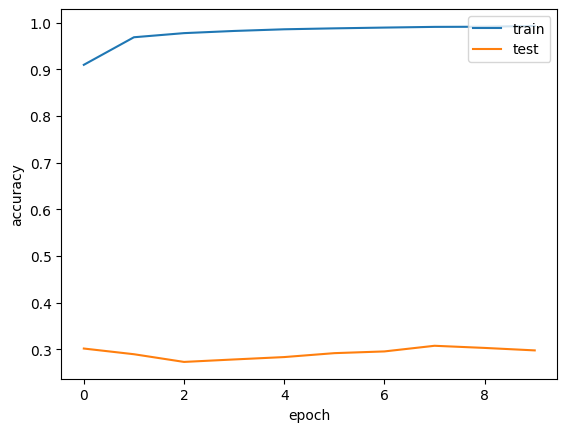

In [100]:
plt.plot(CNN_Train.history['accuracy'])
plt.plot(CNN_Train.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

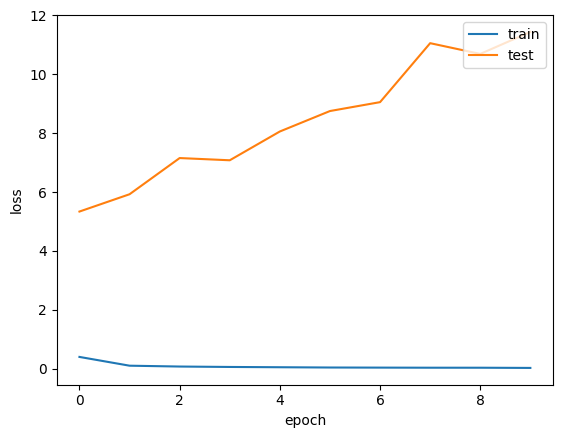

In [101]:
plt.plot(CNN_Train.history['loss'])
plt.plot(CNN_Train.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

313/313 [==============================] - 1s 2ms/step
1


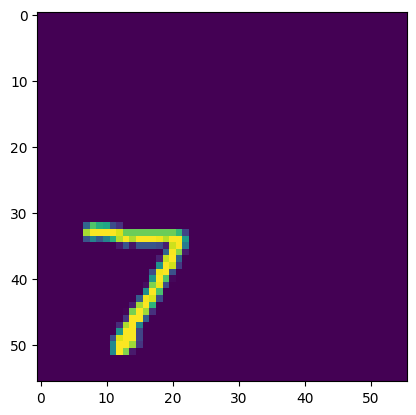

In [102]:
plt.imshow(testX[0])
predict_images= model.predict(testX)
print(np.argmax(predict_images[0])) # to check maximum probability

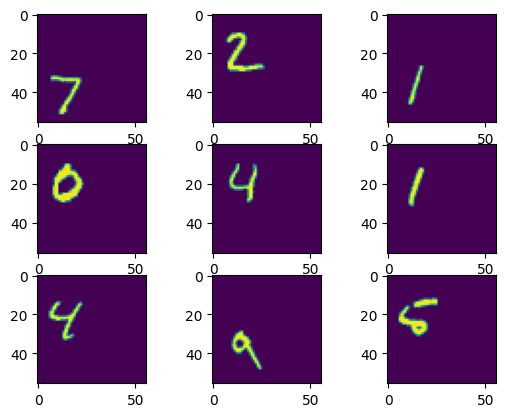

In [103]:
for i in range(9):
  # defining a pyplot 
  plt.subplot(330 +1 +i)
 
 # showing the first 9 images ( plotting the raw pixel data )
  plt.imshow(testX[i])